The following is taken from the tutorial colab notebook referenced in the mujoco install docs https://github.com/deepmind/mujoco/blob/main/python/README.md

In [1]:
#@title Check if installation was successful

try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

Checking that the installation succeeded:
Installation successful.


In [2]:
# basic model
xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)

The `xml` string is written in MuJoCo's [MJCF](http://www.mujoco.org/book/modeling.html), which is an [XML](https://en.wikipedia.org/wiki/XML#Key_terminology)-based modeling language.
  - The only required element is `<mujoco>`. The smallest valid MJCF model is `<mujoco/>` which is a completely empty model.
  - All physical elements live inside the `<worldbody>` which is always the top-level body and constitutes the global origin in Cartesian coordinates.
  - We define two geoms in the world named `red_box` and `green_sphere`.
  - **Question:** The `red_box` has no position, the `green_sphere` has no type, why is that?
    - **Answer:** MJCF attributes have *default values*. The default position is `0 0 0`, the default geom type is `sphere`. The MJCF language is described in the documentation's [XML Reference chapter](https://mujoco.readthedocs.io/en/latest/XMLreference.html).

The `from_xml_string()` method invokes the model compiler, which creates a binary `mjModel` instance.

In [3]:
# Check properties of the model

print('number of geoms in the model:')
print(model.ngeom)

print('\ncolours of the geoms')
print(model.geom_rgba)

number of geoms in the model:
2

colours of the geoms
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]]


In [5]:
# The names of the geoms in the xml can be used to access them
# On it's own, notebook will print out the properties of the geom
model.geom('green_sphere')

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.e+00, 5.e-03, 1.e-04])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 1
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'green_sphere'
  pos: array([0.2, 0.2, 0.2])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([0], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([9.0e-01, 9.5e-01, 1.0e-03, 5.0e-01, 2.0e+00])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [6]:
# The direct access is a shortcut to mujoco's mj_name2id function
# You can also use the id to access the geom, the following shows the names of all geoms
[model.geom(i).name for i in range(model.ngeom)]

['red_box', 'green_sphere']

In [7]:
# MjData contains the state of the model - time, position, velocity

# create new mjData for the model
data = mujoco.MjData(model)

print(data.geom_xpos)

[[0. 0. 0.]
 [0. 0. 0.]]


In [8]:
# The mjData doesn't get initialized with the properties from the xml. E.g. the pos for green_sphere is not
# picked up as it is showing as 0. 0. 0.
# This seems to be something you have to ask to get done
mujoco.mj_kinematics(model, data)
print('raw access:\n', data.geom_xpos)

# MjData also supports named access:
print('\nnamed access:\n', data.geom('green_sphere').xpos)

raw access:
 [[0.  0.  0. ]
 [0.2 0.2 0.2]]

named access:
 [0.2 0.2 0.2]


In [4]:
# Graphics and plotting.
print('Import mediapy:')
import mediapy as media
import matplotlib.pyplot as plt

Import mediapy:


""

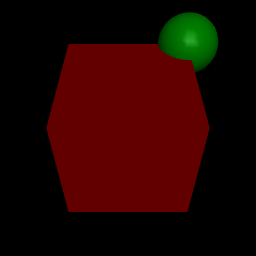

In [32]:
# Basic rendering

xml = """
<mujoco>
  <worldbody>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
# Make model, renderer and data
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model, 256, 256)
data = mujoco.MjData(model)

# Similar to before, we make sure the mjData is upto date with the model definition
# aparently it's good practice to call mj_forward:
mujoco.mj_forward(model, data)

# Apply the data to the render, then show the pixels
renderer.update_scene(data)
media.show_image(renderer.render())

""

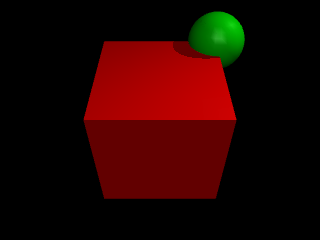

In [36]:
# Now add a light to the model - it radiates straight down ?

xml = """
<mujoco>
  <worldbody>
    <light name="top_light" pos="1 0.5 1" dir="-1 -1 -1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""
# Make model, renderer and data
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)

# Apply the data to the render, then show the pixels
renderer.update_scene(data)
media.show_image(renderer.render())

In [23]:
# A model with moving parts - and a video

# reducing gravity makes it appear like slow motion.
xml = """
<mujoco>
  <option gravity="0 0 -1"/>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="0. 0. -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
renderer = mujoco.Renderer(model)

# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 10.0 # (seconds)
framerate = 60  # (Hz)

frames = []
mujoco.mj_resetData(model, data)
while data.time < duration:
  mujoco.mj_step(model, data)
  if len(frames) < data.time * framerate:
    renderer.update_scene(data, scene_option=scene_option)
    pixels = renderer.render()
    frames.append(pixels)

# Simulate and display video.
media.show_video(frames, fps=framerate)

main colour is 0 blue

<mujoco model="shape">

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".95 .95 .95" rgb2=".9 .9 .9" width="50" height="50"/>
    <material name="grid" texture="grid" texrepeat="128 128"/>
    <texture name="geom_texture" type="cube" builtin="gradient" mark="random" width="128" height="128" rgb1="0.20 0.30 1.00" rgb2="0.00 0.10 0.80" markrgb="0.10 0.20 0.90" random="0.05"/>
    <material name="geom_material" texture="geom_texture" specular="0.0" texuniform="false"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid" euler="1 0 0"/>
    <light pos="0.1 0.1 .6" dir="0.1 0.1 -1" directional="false"/>
    <camera name="closeup" pos="0.0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="shape" pos="0 0 0.014">
      <geom name="one" type="box" size="0.018 0.014 0.014" material="geom_material"/>
    </body>
  </worldbody>

</mujoco>



""

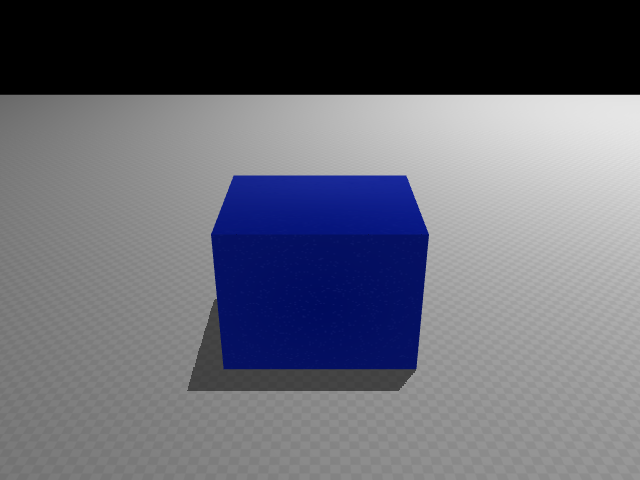

In [879]:
# Generate disc, cube, or sphere
import numpy as np

shape_types = ['sphere', 'box', 'disc']
shape_type_idx = np.random.randint(0, 3)
shape_type = shape_types[shape_type_idx]

# Get x,y,z sizes between 0.01 and 0.02
size_xyz = np.random.randint(10, 21, 3) / 1000
centre_z = "{0:.3f}".format(size_xyz[2])

size = centre_z
if shape_type == 'box':
    size = "{0:.3f} {1:.3f} {2:.3f}".format(size_xyz[0], size_xyz[1], size_xyz[2])
elif shape_type == 'disc':
    # a flattened cylinder
    shape_type = 'cylinder'
    centre_z = size_xyz[2] / 20
    size = "{0:.3f} {1}".format(size_xyz[0], centre_z)
    
rgb = np.random.randint(2, 6, 3)/10
# boost one of the rgb values to make it the predominant colour
colour_main = np.random.randint(0, 3)
rgb[colour_main] += 0.5
print(f'main colour is {0}', ['red','green','blue'][colour_main])
rgb_1 = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0], rgb[1], rgb[2])
rgb_mark = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0]-0.1, rgb[1]-0.1, rgb[2]-0.1)
rgb_2 = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0]-0.2, rgb[1]-0.2, rgb[2]-0.2)

shape_xml = """
<mujoco model="shape">

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".95 .95 .95" rgb2=".9 .9 .9" width="50" height="50"/>
    <material name="grid" texture="grid" texrepeat="128 128"/>
    <texture name="geom_texture" type="cube" builtin="gradient" mark="random" width="128" height="128" rgb1="{3}" rgb2="{4}" markrgb="{5}" random="0.05"/>
    <material name="geom_material" texture="geom_texture" specular="0.0" texuniform="false"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0.1 0.1 .6" dir="0.1 0.1 -1" directional="false"/>
    <camera name="closeup" pos="0.0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="shape" pos="0 0 {2}">
      <geom name="one" type="{0}" size="{1}" material="geom_material"/>
    </body>
  </worldbody>

</mujoco>
""".format(shape_type, size, centre_z, rgb_1, rgb_2, rgb_mark)
print(shape_xml)
shape_model = mujoco.MjModel.from_xml_string(shape_xml)
renderer = mujoco.Renderer(shape_model, 480, 640)
shape_data = mujoco.MjData(shape_model)
mujoco.mj_forward(shape_model, shape_data)
renderer.update_scene(shape_data, camera="closeup")
media.show_image(renderer.render())


red box


""

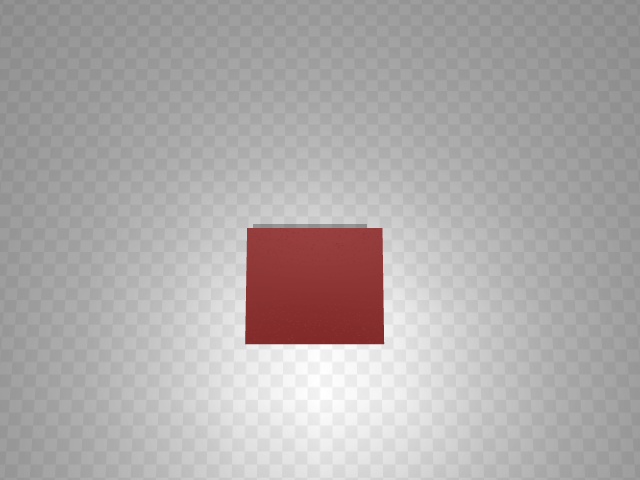

In [2041]:
# Generate disc, cube, or sphere
import numpy as np

shape_types = ['sphere', 'box', 'disc']
shape_type_idx = np.random.randint(0, 3)
shape_type = shape_types[shape_type_idx]
s_type = shape_type

# Get x,y,z sizes between 0.01 and 0.02
size_xyz = np.random.randint(10, 21, 3) / 1000
centre_z = "{0:.3f}".format(size_xyz[2])

size = centre_z
if shape_type == 'box':
    size = "{0:.3f} {1:.3f} {2:.3f}".format(size_xyz[0], size_xyz[1], size_xyz[2])
elif shape_type == 'disc':
    # a flattened cylinder
    shape_type = 'cylinder'
    centre_z = size_xyz[2] / 20
    size = "{0:.3f} {1}".format(2*size_xyz[0], centre_z)

# position the shape, x and y both between -0.025 and 0.025
pos_xy = np.random.randint(-25, 25, 2) / 1000
shape_pos = "{0:.3f} {1:.3f} {2}".format(pos_xy[0], pos_xy[1], centre_z)

# position the light, x and y both between -0.025 and 0.025
pos_xy = np.random.randint(-25, 25, 2) / 100
light_pos = "{0:.3f} {1:.3f} 0.3".format(pos_xy[0], pos_xy[1])

rgb = np.random.randint(2, 6, 3)/10
# boost one of the rgb values to make it the predominant colour
colour_main = np.random.randint(0, 3)
rgb[colour_main] += 0.5

rgb_1 = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0], rgb[1], rgb[2])
rgb_mark = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0]-0.1, rgb[1]-0.1, rgb[2]-0.1)
rgb_2 = '{0:.2f} {1:.2f} {2:.2f}'.format(rgb[0]-0.2, rgb[1]-0.2, rgb[2]-0.2)

# Rotate the shape about the z axis
rotate = "0 0 {0}".format(np.random.randint(0, 90))

# camera pos, vary the z and y. z can go from 0.01 with y from -0.2 to -0.1, up to 
# 0.2 with y from -0.2 to 0.0
cam_z = np.random.randint(1, 21)
# y is adjusted based on z (i.e. how high the camera is)
cam_y = -np.random.randint((20-cam_z)//2, 21) / 100
cam_z = cam_z / 100
cam_pos = "0 {0:.2f} {1:.2f}".format(cam_y, cam_z)

shape_xml = """
<mujoco model="shape">

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".95 .95 .95" rgb2=".9 .9 .9" width="50" height="50"/>
    <material name="grid" texture="grid" texrepeat="128 128"/>
    <texture name="geom_texture" type="cube" builtin="gradient" mark="random" width="128" height="128" rgb1="{3}" rgb2="{4}" markrgb="{5}" random="0.05"/>
    <material name="geom_material" texture="geom_texture" specular="0.0" texuniform="false"/>
  </asset>

  <worldbody>
    <geom size=".4 .4 .01" type="plane" material="grid"/>
    <light diffuse=".2 .2 .2" pos="{7}" mode="targetbody" target="camera_target"/>
    <camera name="closeup" pos="{8}" mode="targetbody" target="camera_target"/>
    <body name="camera_target" pos="0 0 0"/>
    <body name="shape" pos="{2}">
      <geom name="one" type="{0}" size="{1}" material="geom_material" euler="{6}"/>
    </body>
  </worldbody>

</mujoco>
""".format(shape_type, size, shape_pos, rgb_1, rgb_2, rgb_mark, rotate, light_pos, cam_pos)

# print(shape_xml)
print('{0} {1}'.format(['red','green','blue'][colour_main], s_type))

shape_model = mujoco.MjModel.from_xml_string(shape_xml)
renderer = mujoco.Renderer(shape_model, 480, 640)
shape_data = mujoco.MjData(shape_model)
mujoco.mj_forward(shape_model, shape_data)
renderer.update_scene(shape_data, camera="closeup")
media.show_image(renderer.render())

""

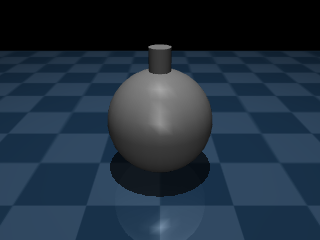

In [820]:
tippe_top_xml = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
tippe_top = mujoco.MjModel.from_xml_string(tippe_top_xml)
renderer = mujoco.Renderer(tippe_top)
tippe_top_data = mujoco.MjData(tippe_top)
mujoco.mj_forward(tippe_top, tippe_top_data)
renderer.update_scene(tippe_top_data, camera="closeup")
media.show_image(renderer.render())

In [28]:
duration = 10    # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
frames = []
mujoco.mj_resetDataKeyframe(tippe_top, tippe_top_data, 0)  # Reset the state to keyframe 0
while tippe_top_data.time < duration:
  mujoco.mj_step(tippe_top, tippe_top_data)
  if len(frames) < tippe_top_data.time * framerate:
    renderer.update_scene(tippe_top_data, "closeup")
    pixels = renderer.render()
    frames.append(pixels)

media.show_video(frames, fps=framerate)